In [1]:
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


In [2]:
(x_img_train,y_label_train),\
(x_img_test,y_label_test)=cifar10.load_data()

In [3]:
print('train:',len(x_img_train))
print('test',len(x_img_test))

train: 50000
test 10000


In [4]:
x_img_train.shape

(50000, 32, 32, 3)

In [5]:
x_img_test[0]

array([[[158, 112,  49],
        [159, 111,  47],
        [165, 116,  51],
        ...,
        [137,  95,  36],
        [126,  91,  36],
        [116,  85,  33]],

       [[152, 112,  51],
        [151, 110,  40],
        [159, 114,  45],
        ...,
        [136,  95,  31],
        [125,  91,  32],
        [119,  88,  34]],

       [[151, 110,  47],
        [151, 109,  33],
        [158, 111,  36],
        ...,
        [139,  98,  34],
        [130,  95,  34],
        [120,  89,  33]],

       ...,

       [[ 68, 124, 177],
        [ 42, 100, 148],
        [ 31,  88, 137],
        ...,
        [ 38,  97, 146],
        [ 13,  64, 108],
        [ 40,  85, 127]],

       [[ 61, 116, 168],
        [ 49, 102, 148],
        [ 35,  85, 132],
        ...,
        [ 26,  82, 130],
        [ 29,  82, 126],
        [ 20,  64, 107]],

       [[ 54, 107, 160],
        [ 56, 105, 149],
        [ 45,  89, 132],
        ...,
        [ 24,  77, 124],
        [ 34,  84, 129],
        [ 21,  67, 110]]

In [6]:
y_label_train.shape

(50000, 1)

In [7]:
label_dict = {0:"airplane",1:"automobile",2:"bird",3:"cat",4:"deer",
             5:"dog",6:"frog",7:"horse",8:"ship",9:"truck"}

In [8]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,
                                 idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12,14)
    if num > 25: num = 25
    for i in range(0,num):
        ax = plt.subplot(5,5,1+i)
        ax.imshow(images[idx],cmap = 'binary')
        
        title = str(i)+','+label_dict[labels[i][0]]
        if len(prediction) > 0:
            title += '=>' +label_dict[prediction[1]]
            
        ax.set_title(title,fontsize=10)
        ax.set_xticks([]);ax.set_yticks([])
        idx+=1
    plt.show()

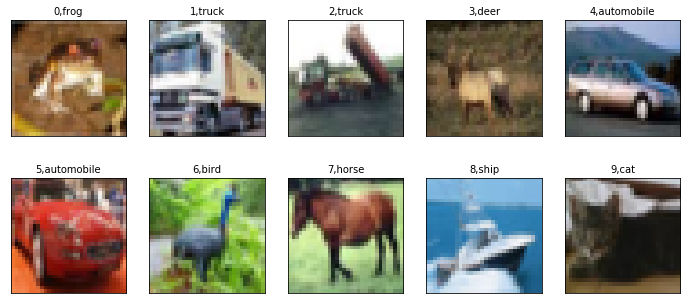

In [9]:
plot_images_labels_prediction(x_img_train,y_label_train,[],0)

In [10]:
x_img_train[0][0][0]

array([59, 62, 63], dtype=uint8)

In [11]:
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [12]:
x_img_train_normalize[0][0][0]

array([0.23137255, 0.24313726, 0.24705882], dtype=float32)

In [13]:
y_label_train.shape

(50000, 1)

In [14]:
y_label_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [15]:
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)

In [16]:
y_label_train_OneHot.shape

(50000, 10)

In [17]:
y_label_train_OneHot[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [18]:
#10.3 建立模型
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D,ZeroPadding2D

In [19]:
model = Sequential()

In [20]:
model.add(Conv2D(filters=32,kernel_size=(3,3),
                input_shape=(32,32,3),
                activation='relu',
                padding='same'))

Instructions for updating:
Colocations handled automatically by placer.


In [21]:
model.add(Dropout(rate=0.25))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [22]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [23]:
model.add(Conv2D(filters=64,kernel_size=(3,3),
                activation='relu',padding='same'))

In [24]:
model.add(Dropout(rate=0.25))

In [25]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [26]:
model.add(Flatten())
model.add(Dropout(rate=0.25))

In [27]:
model.add(Dense(1024,activation='relu'))
model.add(Dropout(rate=0.25))

In [28]:
model.add(Dense(10,activation='softmax'))

In [29]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
__________

In [30]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',metrics=['accuracy'])

In [31]:
train_history=model.fit(x_img_train_normalize,y_label_train_OneHot,
                       validation_split=0.2,
                       epochs=10,batch_size=128,verbose=1)

Instructions for updating:
Use tf.cast instead.
Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 104s 3ms/step - loss: 1.4873 - acc: 0.4640 - val_loss: 1.2763 - val_acc: 0.5793
Epoch 2/10
40000/40000 [==============================] - 103s 3ms/step - loss: 1.1333 - acc: 0.5965 - val_loss: 1.1388 - val_acc: 0.6279
Epoch 3/10
40000/40000 [==============================] - 104s 3ms/step - loss: 0.9825 - acc: 0.6539 - val_loss: 1.0158 - val_acc: 0.6602
Epoch 4/10
40000/40000 [==============================] - 103s 3ms/step - loss: 0.8776 - acc: 0.6929 - val_loss: 0.9629 - val_acc: 0.6945
Epoch 5/10
40000/40000 [==============================] - 103s 3ms/step - loss: 0.7856 - acc: 0.7235 - val_loss: 0.8780 - val_acc: 0.7041
Epoch 6/10
40000/40000 [==============================] - 103s 3ms/step - loss: 0.7028 - acc: 0.7537 - val_loss: 0.8440 - val_acc: 0.7169
Epoch 7/10
40000/40000 [==============================] - 103s 3ms/step - 

In [36]:
train_history = model.fit(x=x_img_train_normalize,
                         y=y_label_train_OneHot,validation_split=0.2,
                         epochs=10,batch_size=200,verbose=2)


Train on 40000 samples, validate on 10000 samples
Epoch 1/10
 - 93s - loss: 0.3380 - acc: 0.8832 - val_loss: 0.7159 - val_acc: 0.7525
Epoch 2/10
 - 93s - loss: 0.2978 - acc: 0.8972 - val_loss: 0.7071 - val_acc: 0.7656
Epoch 3/10
 - 93s - loss: 0.2673 - acc: 0.9057 - val_loss: 0.7116 - val_acc: 0.7586
Epoch 4/10
 - 93s - loss: 0.2431 - acc: 0.9156 - val_loss: 0.7180 - val_acc: 0.7590
Epoch 5/10
 - 93s - loss: 0.2241 - acc: 0.9245 - val_loss: 0.7329 - val_acc: 0.7608
Epoch 6/10
 - 93s - loss: 0.1980 - acc: 0.9323 - val_loss: 0.7499 - val_acc: 0.7579
Epoch 7/10
 - 93s - loss: 0.1912 - acc: 0.9347 - val_loss: 0.7508 - val_acc: 0.7559
Epoch 8/10
 - 93s - loss: 0.1720 - acc: 0.9405 - val_loss: 0.7608 - val_acc: 0.7517
Epoch 9/10
 - 93s - loss: 0.1610 - acc: 0.9447 - val_loss: 0.7857 - val_acc: 0.7500
Epoch 10/10
 - 93s - loss: 0.1543 - acc: 0.9465 - val_loss: 0.7962 - val_acc: 0.7501


TypeError: show_train_history() missing 1 required positional argument: 'validation'

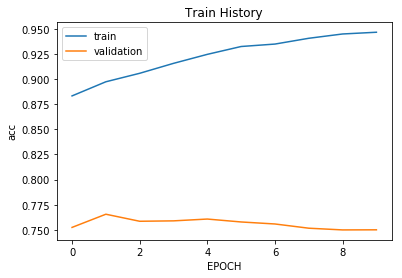

In [37]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('EPOCH')
    plt.legend(['train','validation'],loc='upper left')
    plt.show()
show_train_history(train_history,'acc','val_acc')

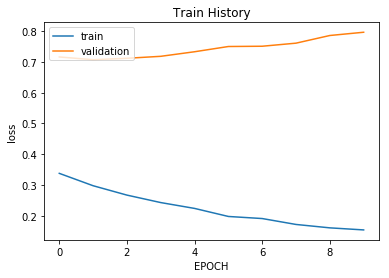

In [38]:
show_train_history(train_history,'loss','val_loss')

In [39]:
scores = model.evaluate(x_img_test_normalize,
                       y_label_test_OneHot,verbose=0)
scores[1]

0.746

In [40]:
prediction = model.predict_classes(x_img_test_normalize)

In [41]:
prediction[:10]

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1])

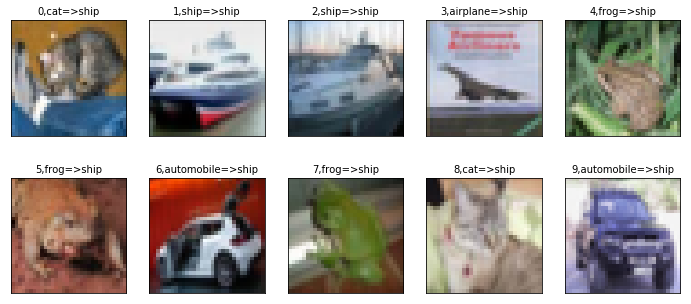

In [42]:
plot_images_labels_prediction(x_img_test,y_label_test,
                             prediction,0,10)

In [43]:
Predicted_Probability = model.predict(x_img_test_normalize)

In [48]:
def show_Predicted_Probability(y,prediction,
                              x_img,Predicted_Probability,i):
    print('label:',label_dict[y[i][0]],
         'predict:',label_dict[prediction[i]])
    plt.figure(figsize=[2,2])
    plt.imshow(np.reshape(x_img_test[i],(32,32,3)))
    plt.show()
    for j in range(10):
        print(label_dict[j]+
             'Probability:%1.9f'%(Predicted_Probability[i][j]))

label: cat predict: cat


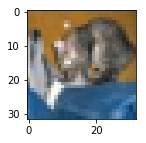

airplaneProbability:0.000242506
automobileProbability:0.000083972
birdProbability:0.001625710
catProbability:0.900834799
deerProbability:0.000143417
dogProbability:0.086570017
frogProbability:0.005054839
horseProbability:0.000889823
shipProbability:0.004548152
truckProbability:0.000006766


In [49]:
show_Predicted_Probability(y_label_test,prediction,
                          x_img_test,Predicted_Probability,0)

label: airplane predict: airplane


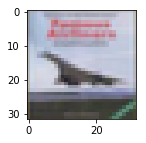

airplaneProbability:0.911507010
automobileProbability:0.000754483
birdProbability:0.008122395
catProbability:0.000612606
deerProbability:0.005073400
dogProbability:0.000000474
frogProbability:0.000000303
horseProbability:0.000008588
shipProbability:0.073900804
truckProbability:0.000019913


In [50]:
show_Predicted_Probability(y_label_test,prediction,
                          x_img_test,Predicted_Probability,3)

In [51]:
prediction.shape

(10000,)

In [52]:
y_label_test.shape

(10000, 1)

In [53]:
y_label_test.reshape(-1)

array([3, 8, 8, ..., 5, 1, 7])

In [54]:
import pandas as pd
print(label_dict)
pd.crosstab(y_label_test.reshape(-1),prediction,
           rownames=['label'],colnames=['predict'])

{0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}


predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,774,11,46,23,20,6,17,13,67,23
1,13,834,11,14,6,7,17,7,26,65
2,58,2,600,68,107,46,83,23,9,4
3,17,3,53,610,59,129,74,40,7,8
4,7,1,40,73,750,19,56,44,8,2
5,9,1,36,204,54,605,41,39,7,4
6,2,3,24,55,23,15,871,3,3,1
7,8,0,23,42,47,59,8,804,5,4
8,34,22,13,23,15,9,11,4,856,13
